# Imports

In [97]:
# Standard imports
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [98]:
# Importing our own code
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

# Load the Dataset

In [99]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

### Structure of the dataset

Each dataset *split* (train or valid or test) is represented as a *tuple* of 3 values:

* a 1D array of user_ids
* a 1D array of item_ids
* a 1D array of ratings

In [100]:
n_train_examples = len(train_tuple[0])
N = n_train_examples

# Unpack the tuple into its three contained arrays
userids_tr_N = train_tuple[0]
itemids_tr_N = train_tuple[1]
ratings_tr_N = train_tuple[2]

n_validation_examples = len(valid_tuple[0])
M = n_validation_examples
userids_va_M = valid_tuple[0]
itemids_va_M = valid_tuple[1]
ratings_va_M = valid_tuple[2]

n_test_examples = len(test_tuple[0])
T = n_test_examples

In [101]:
test_tuple

(array([772, 471, 641, ..., 926, 522, 788]),
 array([ 36, 228, 401, ...,  94, 547, 247]),
 array([3, 5, 4, ..., 5, 4, 3]))

### Print first 5 values in each array

We should see that:

* user 662 gave movie 761 a 5
* user 298 gave movie 90 a 4
* user 90 gave movie 349 a 4
* user 912 gave movie 917 a 4
* user 302 gave movie 42 a 3

In [102]:
print(userids_tr_N[:5])
print(itemids_tr_N[:5])
print(ratings_tr_N[:5])

[662 298  90 912 302]
[761  90 349 917  42]
[5 4 4 4 3]


### Load Movie Info

In [103]:
DATA_PATH = 'data_movie_lens_100k'

In [104]:
movie_df = pd.read_csv(os.path.join(DATA_PATH, 'movie_info.csv'))

In [105]:
movie_df.head()

,item_id,title,release_year,orig_item_id
0,0,Toy Story (1995),1995,1
1,1,GoldenEye (1995),1995,2
2,2,Four Rooms (1995),1995,3
3,3,Get Shorty (1995),1995,4
4,4,Copycat (1995),1995,5


### Load User Info

In [106]:
user_df = pd.read_csv(os.path.join(DATA_PATH, 'user_info.csv'))

In [107]:
user_df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


# Problem 1 - Analysis Tasks

In [108]:
batch_size = 1000 # Fix batch size for all of problem 1

epoch       0.000 | loss_total     0.47600 | tr RMSE     1.24455 | va RMSE     1.24854 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.04716 | tr RMSE     1.12613 | va RMSE     1.12408 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total    -0.38258 | tr RMSE     1.22110 | va RMSE     1.21321 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total    -0.97736 | tr RMSE     1.48913 | va RMSE     1.47774 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total    -3.94943 | tr RMSE     4.14191 | va RMSE  

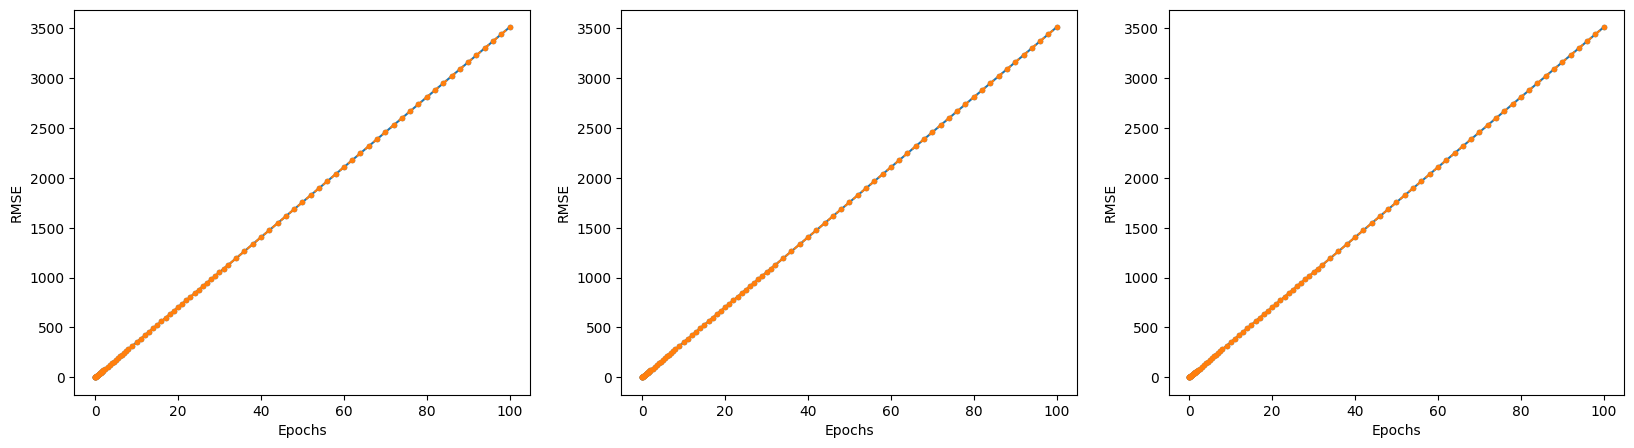

In [109]:
# Step 3(i)
# With no regularization (alpha=0) train a CollabFilterOneVectorPerItem using SGD.
# Try three possible values of K: 2, 10, and 50

kValues = [2, 10, 50]
epoch_rmse_tuples = []
for k in kValues:
    model = CollabFilterOneVectorPerItem(n_factors=k, alpha=0, batch_size=1000, step_size=.5)
    train_data_tuple = (userids_tr_N, itemids_tr_N, ratings_tr_N)
    valid_data_tuple = (userids_va_M, itemids_va_M, ratings_va_M)
    model.init_parameter_dict(n_users=n_users, n_items=n_items, train_tuple=train_data_tuple)
    model.fit(train_data_tuple, valid_data_tuple)
    epoch_rmse_tuples.append((model.trace_epoch, model.trace_rmse_train, model.trace_rmse_valid))
    
# TODO: implement
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (epoch, train_rmse, valid_rmse) in enumerate(epoch_rmse_tuples):
    axe = axes[i]
    axe.plot(epoch, train_rmse, '.-', label='train RMSE')
    axe.plot(epoch, valid_rmse, '.--', label='valid RMSE')
    axe.set_xlabel("Epochs")
    axe.set_ylabel("RMSE")

plt.show()

In [110]:
# Step 3(ii)
# Train with K = 50 now with moderate regularization by setting strength alpha > 0 to try to eliminate overfitting you saw in 3(i)
# Focus only on K = 50

# TODO: implement

In [111]:
# For the best run at each K (with/without alpha > 0), please record that model's:
# - RMSE and MAE on the validation set
# - RMSE and MAE on the test set
# - Value of parameters mu, b, c, u, v (not needed for the report, but useful to save for later)

# You likely need to adjust the SGD step_size or n_epochs hyperparameter here. You should aim to show runs that last 
# until either training error visibly converges or until you see obvious overfitting.

# Hint: If you do see overfitting, you might consider using early stopping (by monitoring the validation set performance)
# to get the best possible model for each step above. 
# Note that optimization contains randomness, both from the initialization and from the minibatch sampling in SGD,
# but by controlling the random state you can allow your optimization to be reproducible

# TODO: implement

Next, do the report tasks:

1a) Figure and caption: RMSE vs epoch with alpha=0. 3 figures side by side, with K=2,10,50
    - Each panel should show two lines, one for train RMSE and one for validation RMSE

1b) Figure and caption: RMSE vs epoch with alpha > 0

1c) Table and caption: Report the RMSE and MAE for train, validation, and test sets for the best version of each of these latent factor models (one per row):
    - LF with K=2
    - LF with K=10
    - LF with K=50 with alpha=0
    - LF with K=50 with alpha>0

1d) Figure and caption

# Problem 2